In [165]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx

In [166]:
# 55 MINTS
data=open("/Users/anujdimri/Random-Delay-and-Indirections/Exampleall_10apr_rd11-20_05realtimetest_up.txt","r")
lines=data.read().split('\n')
print lines

['all uplood RSUExampleScenario.node[20].appl.70-id  RSUExampleScenario.node[22].veinsmobility 35718.00049 17 35692 orig lon lat 6.11603 49.604 creator RSUExampleScenario.node[6].veinsmobility uploader RSUExampleScenario.node[20].veinsmobility', 'all uplood RSUExampleScenario.node[25].appl.77-id  RSUExampleScenario.node[27].veinsmobility 35722.000472 18 35698 orig lon lat 6.11568 49.6023 creator RSUExampleScenario.node[22].veinsmobility uploader RSUExampleScenario.node[25].veinsmobility', 'all uplood RSUExampleScenario.node[21].appl.85-id  RSUExampleScenario.node[26].veinsmobility 35726.000478 17 35701 orig lon lat 6.11726 49.6026 creator RSUExampleScenario.node[21].veinsmobility uploader RSUExampleScenario.node[21].veinsmobility', 'all uplood RSUExampleScenario.node[4].appl.83-id  RSUExampleScenario.node[31].veinsmobility 35729.00048 16 35700 orig lon lat 6.12795 49.6075 creator RSUExampleScenario.node[4].veinsmobility uploader RSUExampleScenario.node[4].veinsmobility', 'all uplood RS

In [167]:
lines[0].split()

['all',
 'uplood',
 'RSUExampleScenario.node[20].appl.70-id',
 'RSUExampleScenario.node[22].veinsmobility',
 '35718.00049',
 '17',
 '35692',
 'orig',
 'lon',
 'lat',
 '6.11603',
 '49.604',
 'creator',
 'RSUExampleScenario.node[6].veinsmobility',
 'uploader',
 'RSUExampleScenario.node[20].veinsmobility']

# 2 is msg id, 4+5 is msg  upload time, 6 is msg creation time, 10 is long msg creatn, 11 is lat msg creation, 13 is creator, 15 is uploader

# -1 is uploader, -3 is creator, -5 is creation lat, -6 is creation long, -10 is msg creation time, -11 +-12 is upload time,  2 is msg id


In [168]:
aa=lines[0].split()

In [169]:
aa[4],aa[5]


('35718.00049', '17')

In [170]:
(int(aa[6])+int(aa[5]))

35709

In [171]:
int(float(aa[4]))

35718

In [172]:
log=[]
log.extend((aa[2],int(float(aa[-10])),(int(float(aa[-12]))+int(aa[-11])),(int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10])),13.8889*((int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10]))),aa[-3],float(aa[-5]),float(aa[-6]),aa[-1]))

In [173]:
log


['RSUExampleScenario.node[20].appl.70-id',
 35692,
 35735,
 43,
 597.2227,
 'RSUExampleScenario.node[6].veinsmobility',
 49.604,
 6.11603,
 'RSUExampleScenario.node[20].veinsmobility']

In [174]:
log=[]
# [msg-id, creation time, upload time, delat, distance, created by, creation_x, creation_y, uploader]
for i in range(len(lines)-1):
    #print i
    aa=lines[i].split()
    log.append([aa[2],int(float(aa[-10])),(int(float(aa[-12]))+int(aa[-11])),(int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10])),13.8889*((int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10]))),aa[-3],float(aa[-5]),float(aa[-6]),aa[-1]])    

In [175]:
log

[['RSUExampleScenario.node[20].appl.70-id',
  35692,
  35735,
  43,
  597.2227,
  'RSUExampleScenario.node[6].veinsmobility',
  49.604,
  6.11603,
  'RSUExampleScenario.node[20].veinsmobility'],
 ['RSUExampleScenario.node[25].appl.77-id',
  35698,
  35740,
  42,
  583.3338,
  'RSUExampleScenario.node[22].veinsmobility',
  49.6023,
  6.11568,
  'RSUExampleScenario.node[25].veinsmobility'],
 ['RSUExampleScenario.node[21].appl.85-id',
  35701,
  35743,
  42,
  583.3338,
  'RSUExampleScenario.node[21].veinsmobility',
  49.6026,
  6.11726,
  'RSUExampleScenario.node[21].veinsmobility'],
 ['RSUExampleScenario.node[4].appl.83-id',
  35700,
  35745,
  45,
  625.0005,
  'RSUExampleScenario.node[4].veinsmobility',
  49.6075,
  6.12795,
  'RSUExampleScenario.node[4].veinsmobility'],
 ['RSUExampleScenario.node[5].appl.116-id',
  35710,
  35756,
  46,
  638.8894,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6103,
  6.13884,
  'RSUExampleScenario.node[5].veinsmobility'],
 ['RSUExampleScenario

In [176]:
log[0]


['RSUExampleScenario.node[20].appl.70-id',
 35692,
 35735,
 43,
 597.2227,
 'RSUExampleScenario.node[6].veinsmobility',
 49.604,
 6.11603,
 'RSUExampleScenario.node[20].veinsmobility']


# Corresponding to each user

In [177]:
user=[]
for i in range(len(log)):
    if log[i][-1]=='RSUExampleScenario.node[19].veinsmobility':
        user.append(log[i])

In [178]:
user

[['RSUExampleScenario.node[19].appl.143-id',
  35720,
  35770,
  50,
  694.4449999999999,
  'RSUExampleScenario.node[19].veinsmobility',
  49.611,
  6.14193,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.231-id',
  35744,
  35793,
  49,
  680.5561,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6111,
  6.13967,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.364-id',
  35771,
  35818,
  47,
  652.7783,
  'RSUExampleScenario.node[19].veinsmobility',
  49.6125,
  6.14379,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.650-id',
  35814,
  35859,
  45,
  625.0005,
  'RSUExampleScenario.node[81].veinsmobility',
  49.6123,
  6.13865,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.1761-id',
  35915,
  35961,
  46,
  638.8894,
  'RSUExampleScenario.node[29].veinsmobility',
  49.6123,
  6.12401,
  'RSUExampleScenario.node[19].veinsmobility'],
 

In [179]:
len(user)

10

# add uploader delay and distance

In [180]:
user[1]

['RSUExampleScenario.node[19].appl.231-id',
 35744,
 35793,
 49,
 680.5561,
 'RSUExampleScenario.node[11].veinsmobility',
 49.6111,
 6.13967,
 'RSUExampleScenario.node[19].veinsmobility']

In [181]:
(user[2][2]-user[1][2])

25

In [182]:
for i in range(len(user)):
    if i==0:
        user[i].extend((0,0))
    else:
        user[i].extend((user[i][2]-user[i-1][2],(user[i][2]-user[i-1][2])*13.8889 ))

In [183]:
user

[['RSUExampleScenario.node[19].appl.143-id',
  35720,
  35770,
  50,
  694.4449999999999,
  'RSUExampleScenario.node[19].veinsmobility',
  49.611,
  6.14193,
  'RSUExampleScenario.node[19].veinsmobility',
  0,
  0],
 ['RSUExampleScenario.node[19].appl.231-id',
  35744,
  35793,
  49,
  680.5561,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6111,
  6.13967,
  'RSUExampleScenario.node[19].veinsmobility',
  23,
  319.4447],
 ['RSUExampleScenario.node[19].appl.364-id',
  35771,
  35818,
  47,
  652.7783,
  'RSUExampleScenario.node[19].veinsmobility',
  49.6125,
  6.14379,
  'RSUExampleScenario.node[19].veinsmobility',
  25,
  347.22249999999997],
 ['RSUExampleScenario.node[19].appl.650-id',
  35814,
  35859,
  45,
  625.0005,
  'RSUExampleScenario.node[81].veinsmobility',
  49.6123,
  6.13865,
  'RSUExampleScenario.node[19].veinsmobility',
  41,
  569.4449],
 ['RSUExampleScenario.node[19].appl.1761-id',
  35915,
  35961,
  46,
  638.8894,
  'RSUExampleScenario.node[29].veinsmobility

# new user query string - [msg-id, creation time, upload time, delay, distance, created by, creation_x, creation_y, uploader, upload delay, upload distance]

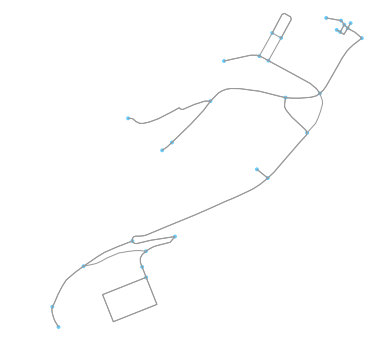

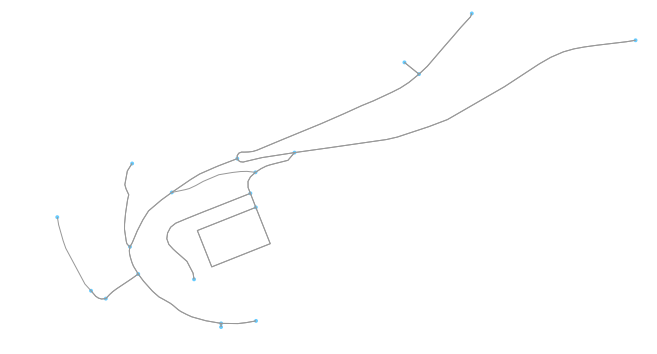

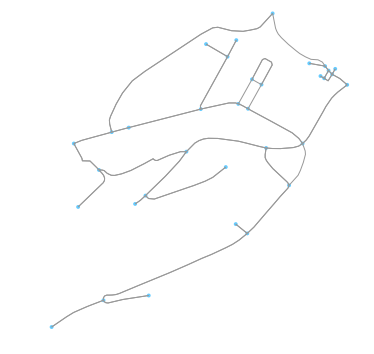

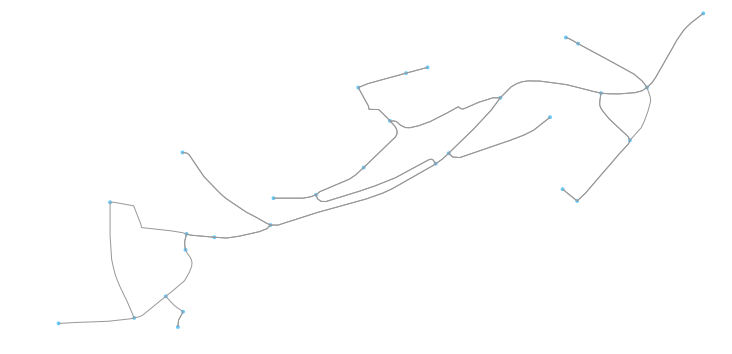

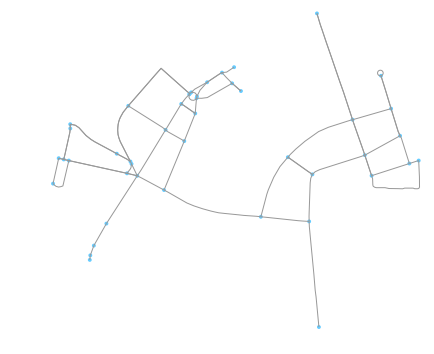

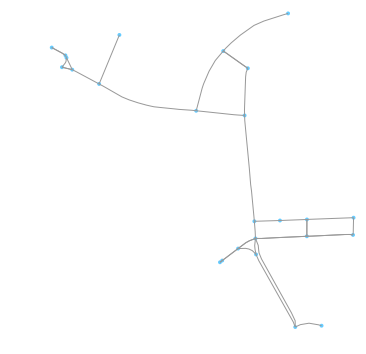

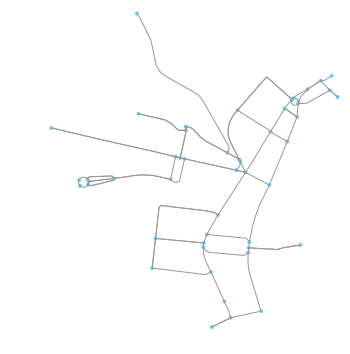

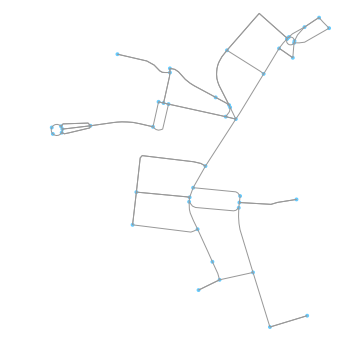

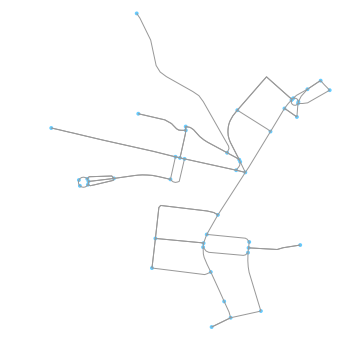

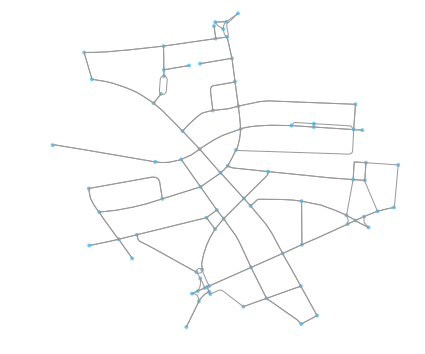

In [184]:
#get graph corresponding to each upload
graphs=[]
for i in user:
    location=(i[6],i[7])
    G1 = ox.graph_from_point(location, distance=i[4], distance_type='network', network_type='drive')
    fig, ax = ox.plot_graph(G1)
    graphs.append(G1)

In [185]:
count=1
for i in graphs:
    print count,
    print " data"
    count=count+1
    print len(i.nodes())
    print len(i.edges())
    print ox.basic_stats(i)

1  data
30
65
{'street_length_total': 3719.842432320014, 'self_loop_proportion': 0.03076923076923077, 'streets_per_node_avg': 8.333333333333334, 'streets_per_node_proportion': {0: 0.0, 1: 0.7, 2: 0.13333333333333333, 3: 2.2333333333333334, 4: 0.16666666666666666}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.2069160804908314, 'streets_per_node_counts': {0: 0, 1: 21, 2: 4, 3: 67, 4: 5}, 'node_density_km': None, 'm': 65, 'n': 30, 'edge_length_total': 6132.176764798562, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 4.333333333333333, 'street_density_km': None, 'street_segments_count': 36, 'street_length_avg': 103.32895645333372, 'intersection_count': 26, 'edge_length_avg': 94.34118099690095}
2  data
20
40
{'street_length_total': 3446.7649126082515, 'self_loop_proportion': 0.05, 'streets_per_node_avg': 14.45, 'streets_per_node_proportion': {0: 0.0, 1: 1.15, 2: 0.35, 3: 3.6, 4: 0.45}, 'clean_intersection_count': None, 'inter

In [133]:
def pruning(current,previous, upload_distance):
    longitude=[]
    latitude=[]
    node=[]
    for i in current.nodes(data=True):
        for key,value in i[1].items():
            print (key, value)
            if key=='y':
                longitude.append(value)
            if key=='x':
                latitude.append(value)
            if key=='osmid':
                node.append(value)


    new_nodes=[]
    for i in range(len(longitude)):
        location=(longitude[i], latitude[i])
        intermediate = ox.graph_from_point(location, distance=upload_distance, distance_type='network', network_type='drive')
        #fig, ax = ox.plot_graph(intermediate)
        for nodes in intermediate.nodes(data=True):
            if nodes not in new_nodes:
                new_nodes.append(nodes)

    new_nodes_only=[]
    for i in new_nodes:
        #print i[0]
        new_nodes_only.append(i[0])
    print len(new_nodes_only)
    new_nodes_only_set=set(new_nodes_only)
    print new_nodes_only_set
    print len(new_nodes_only_set)


    # intersection of nodes
    # G8 is the previous graph
    #put all nodes of previous in a set and do intersection
    new_nodes=[]
    for nodes in previous.nodes(data=True):
        if nodes not in new_nodes:
            new_nodes.append(nodes)



    g3_nodes_only=[]
    for i in new_nodes:
        #print i[0]
        g3_nodes_only.append(i[0])
    print len(g3_nodes_only)
    g3_nodes_only_set=set(g3_nodes_only)
    print g3_nodes_only_set
    print len(g3_nodes_only_set)


    # set intersection
    intersection_nodes=g3_nodes_only_set.intersection(new_nodes_only_set)
    print intersection_nodes
    print len(intersection_nodes)

    aaa=g3_nodes_only_set & new_nodes_only_set
    bbb= g3_nodes_only_set - new_nodes_only_set

    print "intersection", aaa
    print "difference", bbb


    previous.remove_nodes_from(bbb)
    print len(previous.nodes())
    #print len(G3_pruned.nodes())

    print ox.basic_stats(previous)
    return previous

In [186]:
graphs1=graphs

In [187]:
#reversing graph
graphs1.reverse()

In [191]:
counts=0
for i in graphs1:
    print len(graphs1)-counts,
    print " data"
    counts=counts+1
    print len(i.nodes())
    print len(i.edges())
    print ox.basic_stats(i)

10  data
82
209
{'street_length_total': 9723.749819254856, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 4.536585365853658, 'streets_per_node_proportion': {0: 0.0, 1: 0.06097560975609756, 2: 0.036585365853658534, 3: 1.0853658536585367, 4: 0.25609756097560976, 5: 0.024390243902439025}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0228787750540385, 'streets_per_node_counts': {0: 0, 1: 5, 2: 3, 3: 89, 4: 21, 5: 2}, 'node_density_km': None, 'm': 209, 'n': 82, 'edge_length_total': 17931.77326406731, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 5.097560975609756, 'street_density_km': None, 'street_segments_count': 115, 'street_length_avg': 84.55434625439005, 'intersection_count': 79, 'edge_length_avg': 85.79795820127899}
9  data
47
85
{'street_length_total': 5153.461965985452, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 6.872340425531915, 'streets_per_node_proportion': {0: 0.0, 1: 0.14893617021276595, 2: 0.04

In [192]:
graphs1[0].nodes()

NodeView((252019749, 276748328, 61871155, 61871156, 69041205, 252020305, 252020319, 252020320, 252020321, 990056556, 252020847, 528191602, 836712052, 990056573, 252020863, 836712074, 836712083, 1252410519, 252019864, 252019866, 252019867, 1321097885, 252020681, 69040831, 1252557175, 252020943, 252020944, 2190493907, 288704220, 1252410601, 252019946, 252019947, 252019948, 252019949, 252019952, 252019956, 252019964, 252020696, 252019990, 252020697, 5509661984, 75835695, 288747314, 61871157, 69039444, 69039446, 1252557160, 252020594, 252019859, 252020457, 861054329, 252020092, 445083517, 445083520, 69041025, 252020099, 445083528, 990056559, 1234057612, 445083536, 1234057637, 1252557224, 69040554, 69040555, 413487534, 413487535, 69041075, 252020664, 1321097887, 69040572, 252020680, 252019657, 252019661, 71248338, 568060325, 252020708, 252020710, 252019793, 1361212981, 252020665, 1374314999, 288540669))

In [ ]:
for i in range(len(graphs1)-1):
    print ox.basic_stats(graphs1[i])
    current=graphs1[i]
    previous=graphs1[i+1]
    upload_distance=user[len(user)-i-1][-1]
    longitude=[]
    latitude=[]
    node=[]
    for j in graphs1[i].nodes(data=True):
        for key,value in j[1].items():
            print (key, value)
            if key=='y':
                longitude.append(value)
            if key=='x':
                latitude.append(value)
            if key=='osmid':
                node.append(value)


    new_nodes=[]
    for j in range(len(longitude)):
        location=(longitude[j], latitude[j])
        intermediate = ox.graph_from_point(location, distance=upload_distance, distance_type='network', network_type='drive')
        #fig, ax = ox.plot_graph(intermediate)
        for nodes1 in intermediate.nodes(data=True):
            if nodes1 not in new_nodes:
                new_nodes.append(nodes1)

    new_nodes_only=[]
    for j in new_nodes:
        #print i[0]
        new_nodes_only.append(j[0])
    print len(new_nodes_only)
    new_nodes_only_set=set(new_nodes_only)
    print new_nodes_only_set
    print len(new_nodes_only_set)


    # intersection of nodes
    # G8 is the previous graph
    #put all nodes of previous in a set and do intersection
    new_nodes=[]
    for nodes1 in graphs1[i+1].nodes(data=True):
        if nodes1 not in new_nodes:
            new_nodes.append(nodes1)



    g3_nodes_only=[]
    for j in new_nodes:
        #print i[0]
        g3_nodes_only.append(j[0])
    print len(g3_nodes_only)
    g3_nodes_only_set=set(g3_nodes_only)
    print g3_nodes_only_set
    print len(g3_nodes_only_set)


    # set intersection
    intersection_nodes=g3_nodes_only_set.intersection(new_nodes_only_set)
    print intersection_nodes
    print len(intersection_nodes)

    aaa=g3_nodes_only_set & new_nodes_only_set
    bbb= g3_nodes_only_set - new_nodes_only_set

    print "intersection", aaa
    print "difference", bbb


    graphs1[i+1].remove_nodes_from(bbb)
    print len(graphs1[i+1].nodes())
    #print len(G3_pruned.nodes())

    print ox.basic_stats(graphs1[i+1])
    


    

{'street_length_total': 9723.749819254856, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 4.536585365853658, 'streets_per_node_proportion': {0: 0.0, 1: 0.06097560975609756, 2: 0.036585365853658534, 3: 1.0853658536585367, 4: 0.25609756097560976, 5: 0.024390243902439025}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0228787750540385, 'streets_per_node_counts': {0: 0, 1: 5, 2: 3, 3: 89, 4: 21, 5: 2}, 'node_density_km': None, 'm': 209, 'n': 82, 'edge_length_total': 17931.77326406731, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 5.097560975609756, 'street_density_km': None, 'street_segments_count': 115, 'street_length_avg': 84.55434625439005, 'intersection_count': 79, 'edge_length_avg': 85.79795820127899}
('y', 49.6121162)
('x', 6.1073299)
('osmid', 252019749)
('y', 49.6074163)
('x', 6.1017974)
('osmid', 276748328)
('y', 49.6063998)
('x', 6.1064477)
('osmid', 61871155)
('highway', u'traffic_signals')
('y', 49.6072169)

405
set([35348501, 1587861849, 2187358236, 255948832, 361353250, 255948835, 491532326, 308121657, 71243844, 247325366, 262391896, 262391898, 990056556, 990056559, 252020848, 1252557160, 528191602, 75551423, 990056573, 252020863, 278517895, 75567127, 255948941, 66863246, 1833298070, 75550877, 75550878, 1240400031, 74983600, 74983601, 74983602, 74983603, 66912438, 278517944, 71259508, 278517948, 409710781, 74983615, 74983616, 278517953, 252020933, 35350730, 66554059, 35350732, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 71259513, 334385371, 720609503, 255949034, 255949035, 255949037, 255949042, 255949045, 252020982, 442007801, 442007802, 75546878, 69622015, 1280809218, 252021008, 252021012, 69042461, 69042462, 255949103, 3448320314, 276650299, 69041205, 252021058, 141636, 141637, 252021064, 1376883017, 75397450, 141644, 75397453, 141646, 141648, 141651, 141657, 141662, 141663, 66910564, 141672, 255949174, 1252557175, 668860792, 117330309, 1234057612, 670044580, 568060

In [162]:
for nodes1 in graphs1[1+1].nodes(data=True):
    print nodes1

(290288257, {'y': 49.6143592, 'x': 6.1176077, 'osmid': 290288257})
(438250754, {'y': 49.6115458, 'x': 6.1200749, 'osmid': 438250754})
(634341123, {'y': 49.6136931, 'x': 6.1172068, 'osmid': 634341123})
(278517895, {'y': 49.6108896, 'x': 6.1162934, 'osmid': 278517895})
(266223240, {'y': 49.6151235, 'x': 6.1217206, 'osmid': 266223240})
(1374315019, {'y': 49.6133544, 'x': 6.1195675, 'osmid': 1374315019})
(651375756, {'y': 49.6114686, 'x': 6.1220581, 'osmid': 651375756})
(1280809218, {'y': 49.6151396, 'x': 6.121739, 'osmid': 1280809218})
(75546126, {'y': 49.6143286, 'x': 6.1209024, 'osmid': 75546126})
(527956753, {'y': 49.6150368, 'x': 6.1219736, 'osmid': 527956753})
(527956757, {'y': 49.6150787, 'x': 6.1219875, 'osmid': 527956757})
(270689821, {'y': 49.6088189, 'x': 6.1224336, 'osmid': 270689821})
(1240400031, {'y': 49.6137939, 'x': 6.1192151, 'osmid': 1240400031})
(572543529, {'y': 49.6146962, 'x': 6.1219284, 'osmid': 572543529})
(1251610033, {'y': 49.6129893, 'x': 6.1137999, 'osmid': 125

In [ ]:
a=[1,2]

In [ ]:
a